# Downloading GDELT CSVs

In [31]:
import pandas as pd
import wget
import matplotlib.pyplot as plt
import seaborn as sns

## EVENT DATA
To begin with, we need the column names for the event data. We can find these in the GDELT documentation.


In [32]:
names = pd.read_csv('../metadata/GDELT_2.0_Events_Column_Labels_Header_Row_Sep2016.csv')
names

,tableId,dataType,Empty,Description
0,GLOBALEVENTID,INTEGER,NULLABLE,Globally unique identifier assigned to each ev...
1,SQLDATE,INTEGER,NULLABLE,Date the event took place in YYYYMMDD format. ...
2,MonthYear,INTEGER,NULLABLE,"Alternative formatting of the event date, in Y..."
3,Year,INTEGER,NULLABLE,"Alternative formatting of the event date, in Y..."
4,FractionDate,FLOAT,NULLABLE,"Alternative formatting of the event date, comp..."
...,...,...,...,...
56,ActionGeo_Lat,FLOAT,NULLABLE,This is the centroid latitude of the landmark ...
57,ActionGeo_Long,FLOAT,NULLABLE,This is the centroid longitude of the landmark...
58,ActionGeo_FeatureID,STRING,NULLABLE,This is the GNS or GNIS FeatureID for this loc...
59,DATEADDED,INTEGER,NULLABLE,This field stores the date the event was added...


### Fetching the master file list

In [33]:
wget.download('http://data.gdeltproject.org/gdeltv2/masterfilelist.txt', '../metadata/masterfilelist.txt')

'../metadata/masterfilelist (1).txt'

In [34]:
! head -n5 ../metadata/masterfilelist.txt

150383 297a16b493de7cf6ca809a7cc31d0b93 http://data.gdeltproject.org/gdeltv2/20150218230000.export.CSV.zip
318084 bb27f78ba45f69a17ea6ed7755e9f8ff http://data.gdeltproject.org/gdeltv2/20150218230000.mentions.CSV.zip
10768507 ea8dde0beb0ba98810a92db068c0ce99 http://data.gdeltproject.org/gdeltv2/20150218230000.gkg.csv.zip
149211 2a91041d7e72b0fc6a629e2ff867b240 http://data.gdeltproject.org/gdeltv2/20150218231500.export.CSV.zip
339037 dec3f427076b716a8112b9086c342523 http://data.gdeltproject.org/gdeltv2/20150218231500.mentions.CSV.zip


In [35]:
! tail -n5 ../metadata/masterfilelist.txt

105363 a0688fad64709b694a935699427ef0b6 http://data.gdeltproject.org/gdeltv2/20250119181500.mentions.CSV.zip
3815727 60cca96b53c2cb5898be328b936d79ad http://data.gdeltproject.org/gdeltv2/20250119181500.gkg.csv.zip
54098 33ba97ebac400937240a7611eadd9dcc http://data.gdeltproject.org/gdeltv2/20250119183000.export.CSV.zip
120810 13a76c27a63ea0a9cb6622127a0f2ad8 http://data.gdeltproject.org/gdeltv2/20250119183000.mentions.CSV.zip
4141207 91ae8bd101c08cc87cc5d79f895f6f45 http://data.gdeltproject.org/gdeltv2/20250119183000.gkg.csv.zip


From here, we can either batch download all files or have a look on the most recent file.

In [36]:
events = pd.read_csv('http://data.gdeltproject.org/gdeltv2/20250119183000.export.CSV.zip', delimiter='\t', names=names['tableId'])
events

,GLOBALEVENTID,SQLDATE,MonthYear,Year,FractionDate,Actor1Code,Actor1Name,Actor1CountryCode,Actor1KnownGroupCode,Actor1EthnicCode,...,ActionGeo_Type,ActionGeo_FullName,ActionGeo_CountryCode,ActionGeo_ADM1Code,ActionGeo_ADM2Code,ActionGeo_Lat,ActionGeo_Long,ActionGeo_FeatureID,DATEADDED,SOURCEURL
0,1221531628,20240120,202401,2024,2024.0548,CAN,CANADA,CAN,NaN,NaN,...,1,Canada,CA,CA,NaN,60.0000,-96.0000,CA,20250119183000,https://troymedia.com/viewpoint/liberals-turni...
1,1221531629,20240120,202401,2024,2024.0548,CVL,VOTER,NaN,NaN,NaN,...,1,China,CH,CH,NaN,35.0000,105.0000,CH,20250119183000,https://www.news8000.com/lifestyle/money/tikto...
2,1221531630,20240120,202401,2024,2024.0548,LAB,WORKER,NaN,NaN,NaN,...,3,"South Mountain, Arizona, United States",US,USAZ,NaN,33.7650,-113.5570,11618,20250119183000,https://www.workerscompensation.com/daily-head...
3,1221531631,20240120,202401,2024,2024.0548,LAB,WORKER,NaN,NaN,NaN,...,3,"South Mountain, Arizona, United States",US,USAZ,NaN,33.7650,-113.5570,11618,20250119183000,https://www.workerscompensation.com/daily-head...
4,1221531632,20240120,202401,2024,2024.0548,LAB,WORKER,NaN,NaN,NaN,...,2,"Arizona, United States",US,USAZ,NaN,33.7712,-111.3880,AZ,20250119183000,https://www.workerscompensation.com/daily-head...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
855,1221532483,20250119,202501,2025,2025.0521,ran,RANA,NaN,NaN,ran,...,4,"Islamabad, Islamabad, Pakistan",PK,PK08,23674,33.7000,73.1667,-2762812,20250119183000,https://www.app.com.pk/domestic/rana-mashhood-...
856,1221532484,20250119,202501,2025,2025.0521,ran,RANA,NaN,NaN,ran,...,4,"Islamabad, Islamabad, Pakistan",PK,PK08,23674,33.7000,73.1667,-2762812,20250119183000,https://www.app.com.pk/domestic/rana-mashhood-...
857,1221532485,20250119,202501,2025,2025.0521,ran,RANA,NaN,NaN,ran,...,4,"Karachi, Sindh, Pakistan",PK,PK05,40398,24.8667,67.0500,-2764584,20250119183000,https://www.app.com.pk/domestic/rana-mashhood-...
858,1221532486,20250119,202501,2025,2025.0521,ran,RANA,NaN,NaN,ran,...,4,"Karachi, Sindh, Pakistan",PK,PK05,40398,24.8667,67.0500,-2764584,20250119183000,https://www.app.com.pk/domestic/rana-mashhood-...


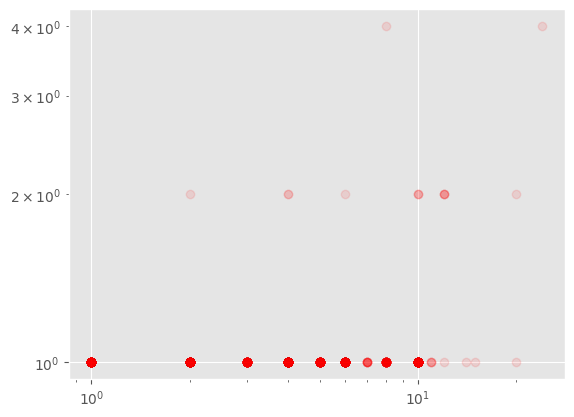

In [12]:
plt.style.use('ggplot')
plt.plot(events['NumMentions'], events['NumSources'], 'ro', alpha = 0.1)
plt.xscale('log')
plt.yscale('log');

In [14]:
events_old = pd.read_csv('http://data.gdeltproject.org/gdeltv2/20150218231500.export.CSV.zip', delimiter='\t', names=names['tableId'])
events_old.head()

,GLOBALEVENTID,SQLDATE,MonthYear,Year,FractionDate,Actor1Code,Actor1Name,Actor1CountryCode,Actor1KnownGroupCode,Actor1EthnicCode,...,ActionGeo_Type,ActionGeo_FullName,ActionGeo_CountryCode,ActionGeo_ADM1Code,ActionGeo_ADM2Code,ActionGeo_Lat,ActionGeo_Long,ActionGeo_FeatureID,DATEADDED,SOURCEURL
0,410415416,20050220,200502,2005,2005.1370,NaN,NaN,NaN,NaN,NaN,...,4,"Buenos Aires, Distrito Federal, Argentina",AR,AR07,22379,-34.5875,-58.6725,-979186,20150218231500,http://www.jpost.com/Diaspora/Nisman-solidarit...
1,410415417,20050220,200502,2005,2005.1370,ARG,ARGENTINEAN,ARG,NaN,NaN,...,4,"Buenos Aires, Distrito Federal, Argentina",AR,AR07,22379,-34.5875,-58.6725,-979186,20150218231500,http://www.jpost.com/Diaspora/Nisman-solidarit...
2,410415418,20140218,201402,2014,2014.1315,NaN,NaN,NaN,NaN,NaN,...,4,"Great Southern, Victoria, Australia",AS,AS07,5387,-36.0667,146.4830,-1576477,20150218231500,http://www.scoop.co.nz/stories/CU1502/S00395/c...
3,410415419,20140218,201402,2014,2014.1315,AUS,AUSTRALIAN,AUS,NaN,NaN,...,4,"Great Southern, Victoria, Australia",AS,AS07,5387,-36.0667,146.4830,-1576477,20150218231500,http://www.scoop.co.nz/stories/CU1502/S00395/c...
4,410415420,20140218,201402,2014,2014.1315,AUS,AUSTRALIA,AUS,NaN,NaN,...,0,NaN,NZ,NZE7,NaN,-36.7500,174.5830,11483124,20150218231500,http://www.scoop.co.nz/stories/CU1502/S00395/c...


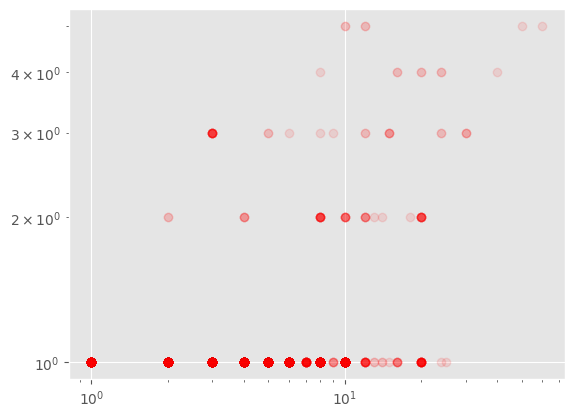

In [15]:
plt.style.use('ggplot')
plt.plot(events_old['NumMentions'], events_old['NumSources'], 'ro', alpha = 0.1)
plt.xscale('log')
plt.yscale('log');

## Mentions

In [25]:
names_ev = pd.read_csv('../metadata/GDELT_2.0_eventMentions_Column_Labels_Header_Row_Sep2016.tsv', sep='\t')
del names_ev['Unnamed: 0']
names_ev.columns = ['tableId', 'dataType', 'empty', 'description']
names_ev

,tableId,dataType,empty,description
0,GLOBALEVENTID,INTEGER,NULLABLE,This is the ID of the event that was mentioned...
1,EventTimeDate,INTEGER,NULLABLE,This is the 15-minute timestamp (YYYYMMDDHHMMS...
2,MentionTimeDate,INTEGER,NULLABLE,This is the 15-minute timestamp (YYYYMMDDHHMMS...
3,MentionType,INTEGER,NULLABLE,This is a numeric identifier that refers to th...
4,MentionSourceName,STRING,NULLABLE,This is a human-friendly identifier of the sou...
5,MentionIdentifier,STRING,NULLABLE,This is the unique external identifier for the...
6,SentenceID,INTEGER,NULLABLE,The sentence within the article where the even...
7,Actor1CharOffset,INTEGER,NULLABLE,The location within the article (in terms of E...
8,Actor2CharOffset,INTEGER,NULLABLE,The location within the article (in terms of E...
9,ActionCharOffset,INTEGER,NULLABLE,The location within the article (in terms of E...


In [26]:
mentions = pd.read_csv('http://data.gdeltproject.org/gdeltv2/20250119183000.mentions.CSV.zip', sep='\t', names=names_ev['tableId'])
mentions

,GLOBALEVENTID,EventTimeDate,MentionTimeDate,MentionType,MentionSourceName,MentionIdentifier,SentenceID,Actor1CharOffset,Actor2CharOffset,ActionCharOffset,InRawText,Confidence,MentionDocLen,MentionDocTone,MentionDocTranslationInfo,Extras,Add New Fields
0,1152703023,20240120004500,20250119183000,1,troymedia.com,https://troymedia.com/viewpoint/liberals-turni...,4,-1,2177,2187,1,70,4013,-4.099561,NaN,NaN,NaN
1,1152694995,20240120000000,20250119183000,1,fhtimes.com,http://www.fhtimes.com/stories/fountain-hills-...,2,-1,124,120,1,100,3449,1.270417,NaN,NaN,NaN
2,1221531628,20250119183000,20250119183000,1,troymedia.com,https://troymedia.com/viewpoint/liberals-turni...,2,1282,1367,1253,1,100,4013,-4.099561,NaN,NaN,NaN
3,1221531629,20250119183000,20250119183000,1,news8000.com,https://www.news8000.com/lifestyle/money/tikto...,21,4769,4697,4750,0,40,6474,0.000000,NaN,NaN,NaN
4,1221531630,20250119183000,20250119183000,1,workerscompensation.com,https://www.workerscompensation.com/daily-head...,2,108,232,188,1,30,4184,-7.213579,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3802,1221532483,20250119183000,20250119183000,1,app.com.pk,https://www.app.com.pk/domestic/rana-mashhood-...,16,5229,-1,5243,1,30,5509,0.933610,NaN,NaN,NaN
3803,1221532484,20250119183000,20250119183000,1,app.com.pk,https://www.app.com.pk/domestic/rana-mashhood-...,12,4128,-1,4155,1,60,5509,0.933610,NaN,NaN,NaN
3804,1221532485,20250119183000,20250119183000,1,app.com.pk,https://www.app.com.pk/domestic/rana-mashhood-...,12,4128,4233,-1,0,10,5509,0.933610,NaN,NaN,NaN
3805,1221532486,20250119183000,20250119183000,1,app.com.pk,https://www.app.com.pk/domestic/rana-mashhood-...,16,5229,5246,5255,0,10,5509,0.933610,NaN,NaN,NaN


## Knowledge Graph

In [29]:
names_kg = pd.read_csv('../metadata/GDELT_2.0_gdeltKnowledgeGraph_Column_Labels_Header_Row_Sep2016.tsv', sep='\t')
del names_kg['Unnamed: 0']
names_kg

,tableId,dataType,Empty,Description
0,GKGRECORDID,STRING,NULLABLE,GKG record ID takes the form “YYYYMMDDHHMMSS-X...
1,DATE,INTEGER,NULLABLE,Date in YYYYMMDDHHMMSS format on which the new...
2,SourceCollectionIdentifier,INTEGER,NULLABLE,Numeric identifier that refers to the source c...
3,SourceCommonName,STRING,NULLABLE,A human-friendly identifier of the source of t...
4,DocumentIdentifier,STRING,NULLABLE,This is the unique external identifier for the...
5,Counts,STRING,NULLABLE,This is the list of Counts found in this docum...
6,V2Counts,STRING,NULLABLE,This field is identical to the V1COUNTS field ...
7,Themes,STRING,NULLABLE,This is the list of all Themes found in the do...
8,V2Themes,STRING,NULLABLE,This contains a list of all GKG themes referen...
9,Locations,STRING,NULLABLE,This is a list of all locations found in the text


In [30]:
kg = pd.read_csv('http://data.gdeltproject.org/gdeltv2/20250119183000.gkg.csv.zip', sep='\t', names=names_kg['tableId'])
kg

,GKGRECORDID,DATE,SourceCollectionIdentifier,SourceCommonName,DocumentIdentifier,Counts,V2Counts,Themes,V2Themes,Locations,...,GCAM,SharingImage,RelatedImages,SocialImageEmbeds,SocialVideoEmbeds,Quotations,AllNames,Amounts,TranslationInfo,Extras
0,20250119183000-0,20250119183000,1,chicoer.com,https://www.chicoer.com/2025/01/19/sanctuary-c...,NaN,NaN,TAX_FNCACT;TAX_FNCACT_OFFICIALS;GOV_LOCALGOV;C...,"TAX_FNCACT_POLICE,2562;TAX_FNCACT_POLICE,5973;...","2#Massachusetts, United States#US#USMA#42.2373...",...,"wc:942,c1.4:16,c12.1:88,c12.10:120,c12.12:46,c...",https://www.chicoer.com/wp-content/uploads/202...,NaN,NaN,NaN,1320|25||every tool in the toolbox#2285|82||Sa...,"First Legal,541;President-elect Donald Trump,6...","100,of state,61;300,people with histories of,1...",NaN,<PAGE_LINKS>https://apnews.com/article/califor...
1,20250119183000-1,20250119183000,1,nltimes.nl,https://nltimes.nl/2025/01/19/ajax-close-gap-l...,NaN,NaN,TAX_WORLDLANGUAGES;TAX_WORLDLANGUAGES_CHUBA;TA...,"TAX_FNCACT_MANAGER,2111;TAX_FNCACT_REFEREE,174...","4#Heerenveen, Friesland, Netherlands#NL#NL02#5...",...,"wc:386,c12.1:29,c12.10:29,c12.12:9,c12.13:10,c...",https://nltimes.nl/sites/nltimes.nl/files/styl...,NaN,NaN,NaN,NaN,"Abe Lenstra,136;Chuba Akpom,243;Devyne Rensch,...","5,points,358;9,points behind their arch,420;",NaN,<PAGE_PRECISEPUBTIMESTAMP>20250119173600</PAGE...
2,20250119183000-2,20250119183000,1,independent.co.uk,https://www.independent.co.uk/news/world/ameri...,NaN,NaN,TAX_FNCACT;TAX_FNCACT_ACTRESS;MEDIA_MSM;TAX_FN...,"TAX_WORLDLANGUAGES_MASSACHUSETTS,2433;TAX_FNCA...","3#San Diego, California, United States#US#USCA...",...,"wc:1526,c1.1:1,c1.4:2,c12.1:92,c12.10:130,c12....",https://static.independent.co.uk/2025/01/17/09...,https://static.independent.co.uk/2025/01/17/08...,NaN,https://youtube.com/theindependent;,NaN,"Evening Headlines,18;Elizabeth Short,89;Norton...","6,months she lived,2614;5,witnesses,6499;",NaN,<PAGE_LINKS>https://people.com/archive/accusin...
3,20250119183000-3,20250119183000,1,coincommunity.com,https://www.coincommunity.com/forum/topic.asp?...,NaN,NaN,EPU_CATS_REGULATION;BAN;USPEC_POLICY1;EPU_POLI...,"BAN,383;USPEC_POLICY1,451;EPU_POLICY_POLICY,45...",NaN,...,"wc:67,c12.1:6,c12.10:5,c12.12:2,c12.14:5,c12.3...",https://www.coincommunity.com/images/ccf-socia...,NaN,NaN,NaN,NaN,"Coin Community,145;Coin Community,343;Advertis...",NaN,NaN,<PAGE_LINKS>https://www.coincommunity.com/lmff...
4,20250119183000-4,20250119183000,1,b93.net,https://b93.net/ixp/252/p/st-elmos-fire-sequel/,NaN,NaN,TAX_FNCACT;TAX_FNCACT_OFFICIAL;TAX_DISEASE;TAX...,"TAX_DISEASE_CHILLS,550;TAX_DISEASE_CHILLS,1887...","3#Georgetown University, District Of Columbia,...",...,"wc:343,c1.1:1,c12.1:31,c12.10:30,c12.12:9,c12....",https://townsquare.media/site/252/files/2025/0...,NaN,NaN,https://youtube.com/@cinematictrailers;https:/...,NaN,"Gen X'ers,398;Demi Moore,510;Rob Lowe,524;Andr...",NaN,NaN,<PAGE_LINKS>https://deadline.com/2024/10/rob-l...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
937,20250119183000-937,20250119183000,1,thereporteronline.com,https://www.thereporteronline.com/2025/01/19/s...,NaN,NaN,NaN,NaN,NaN,...,"wc:94,c12.1:2,c12.10:2,c12.13:1,c12.14:1,c12.3...",https://www.thereporteronline.com/wp-content/u...,NaN,NaN,NaN,NaN,"Zarko Mitov Memorial Invitational,98;Oaks Conv...","3,Results Junior A,148;4,on all,247;4,on vault...",NaN,<PAGE_LINKS>https://checkout.thereporteronline...
938,20250119183000-938,20250119183000,1,standardbredcanada.ca,https://standardbredcanada.ca/news/1-19-25/buc...,NaN,NaN,TAX_FNCACT;TAX_FNCACT_DRIVERS;WB_2670_JOBS;WB_...,"MEDIA_MSM,511;TAX_FNCACT_DRIVERS,61;RETIREMENT...","1#Canada#CA#CA#60#-96#CA;2#Ohio, United States...",...,"wc:111,c12.1:4,c12.10:10,c12.12:1,c12.13:4,c12...",NaN,NaN,NaN,https://youtube.com/user/jporchak;https://yout...,NaN,"North America,86;David Miller,104;Grand Circui...","2,hectic decades of living,233;",NaN,<PAGE_TITLE>'The Buckeye' State: Returning Hom...
